<a href="https://colab.research.google.com/github/AtharvaUpadhyay2004/Sentiment_Analysis_1.6mil/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis Using **NLTK**



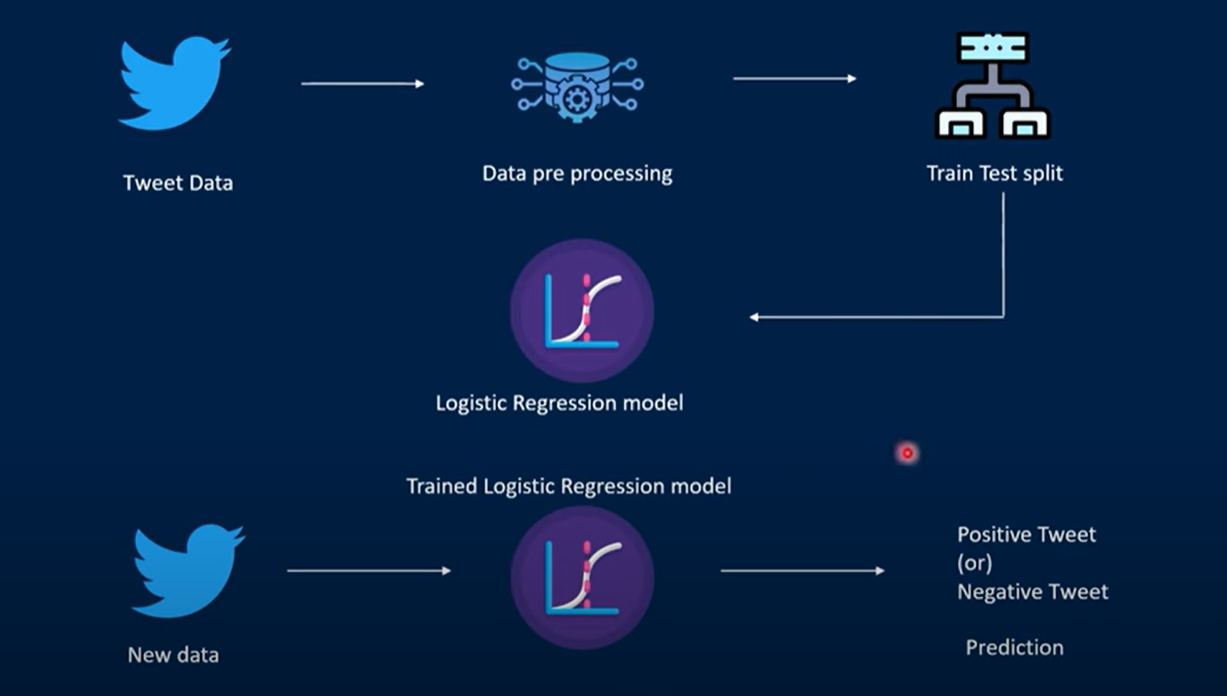

In [1]:
!pip install kaggle

Kaggle Dataset

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# fetching api from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 85% 69.0M/80.9M [00:00<00:00, 182MB/s]
100% 80.9M/80.9M [00:00<00:00, 178MB/s]


In [4]:
# extract Zip
from zipfile import ZipFile
dataset = "/content/sentiment140.zip"

with ZipFile(dataset , 'r') as zip:
  zip.extractall()


Importing the dependencies


In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data Processing

In [7]:
#loading the data in df
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')
twitter_data.shape
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [8]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
# naming column names and reading data again
column_names = ['target','id', 'data', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names = column_names, encoding = 'ISO-8859-1')

In [10]:
# Data Manipulation
NULL = twitter_data.isnull()
NULL.sum()

target    0
id        0
data      0
flag      0
user      0
text      0
dtype: int64

In [11]:
# Checkin the dist
twitter_data['target'].value_counts()
twitter_data.replace({'target':{4:1}}, inplace = True)  # Changing positive with 1

Stemming

In [12]:
port_stemmer = PorterStemmer()
def stemming(content):
  stemmed_content = re.sub('[^a-zA - Z]',' ', content) # remove other characters then alphabets
  stemmed_content = stemmed_content.lower() # all lowercase
  stemmed_content = stemmed_content.split() # # splitting words into list
  stemmed_content = [port_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # removing stopwords
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [13]:
#adding stemmed content to data
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

Train Test Spliting


In [14]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , stratify = Y, random_state = 2)

Vectorisation of text

In [16]:
vectoriser = TfidfVectorizer()
X_train = vectoriser.fit_transform(X_train)
X_test = vectoriser.transform(X_test)

Training the ML model

In [17]:
#appling logistic regression
L_model = LogisticRegression(max_iter = 1000) #max_iter no of iterations
L_model.fit(X_train, Y_train)

Model Evluations

In [20]:
# accuracy score on the trainig data
X_train_predict = L_model.predict(X_train)
Traning_score = accuracy_score(Y_train, X_train_predict)
print("The accuracy of Y train over X train perdict :", Traning_score)

The accuracy of Y train over X train perdict : 0.80145234375


Saving the model

In [21]:
import pickle
filename = 'trained_model.sav'
pickle.dump(L_model, open(filename, 'wb'))

Appling model to random cases


In [22]:
load_model = pickle.load(open('/content/trained_model.sav', 'rb'))
X1 = X_test[199]
print(Y_test[199])
predictt = load_model.predict(X1)
if (predictt[0]==0):
  print("negitive comment")
else:
  print("positive comment")

1
positive comment
